In [ ]:
import cv2
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# def build_model(pretrained):
#     model = Sequential([
#         pretrained,
#         layers.GlobalAveragePooling2D(),
#         layers.Dense(1, activation='sigmoid')
#     ])

#     model.compile(
#         loss='binary_crossentropy',
#         optimizer=Adam(),
#         metrics=['accuracy']
#     )

#     return model

# Generator

In [ ]:
base_path = '/content/drive/MyDrive/finaldataset/'
image_gen = ImageDataGenerator(rescale=1./255.)

train_flow = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [ ]:
# image_gen1 = ImageDataGenerator(rescale=1./255.)

# valid_flow = image_gen1.flow_from_directory(
#     base_path + 'valid/',
#     target_size=(224, 224),
#     batch_size=64,
#     class_mode='binary'
# )


# Train Model DenseNet   

In [ ]:
densenet = DenseNet121(
    weights=None,
    include_top=False,
    input_shape=(224,224,3)
)
model = build_model(densenet)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1025      
                                                                 
Total params: 7,038,529
Trainable params: 6,954,881
Non-trainable params: 83,648
_________________________________________________________________


In [ ]:
model.fit_generator(train_flow,epochs=10)

<ipython-input-9-6b9454bd496a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_flow,epochs=10)


Epoch 1/10
32/32 [==============================] - 2302s 72s/step - loss: 0.5905 - accuracy: 0.6950
Epoch 2/10
32/32 [==============================] - 2123s 66s/step - loss: 0.4985 - accuracy: 0.7600
Epoch 3/10
32/32 [==============================] - 2089s 65s/step - loss: 0.4765 - accuracy: 0.7640
Epoch 4/10
10/32 [========>.....................] - ETA: 22:22 - loss: 0.4322 - accuracy: 0.8074

In [ ]:
train_steps = 399//64
valid_steps = 400//64

history = model.fit_generator(
    train_flow,
    epochs = 10,
    steps_per_epoch =train_steps,
    validation_data =valid_flow,
    validation_steps = valid_steps
)


<ipython-input-7-2052fa1d5f91>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
6/6 [==============================] - 542s 86s/step - loss: 0.8739 - accuracy: 0.4985 - val_loss: 0.6938 - val_accuracy: 0.5052
Epoch 2/10
6/6 [==============================] - 334s 56s/step - loss: 0.7300 - accuracy: 0.5373 - val_loss: 0.6966 - val_accuracy: 0.4922
Epoch 3/10
6/6 [==============================] - 338s 57s/step - loss: 0.6837 - accuracy: 0.5731 - val_loss: 0.7014 - val_accuracy: 0.5026
Epoch 4/10
6/6 [==============================] - 362s 62s/step - loss: 0.6492 - accuracy: 0.6615 - val_loss: 0.7097 - val_accuracy: 0.5078
Epoch 5/10
6/6 [==============================] - 332s 56s/step - loss: 0.6441 - accuracy: 0.6657 - val_loss: 0.6957 - val_accuracy: 0.5339
Epoch 6/10
6/6 [==============================] - 334s 57s/step - loss: 0.6071 - accuracy: 0.6955 - val_loss: 0.7033 - val_accuracy: 0.5000
Epoch 7/10
6/6 [==============================] - 330s 56s/step - loss: 0.5870 - accuracy: 0.6866 - val_loss: 0.6916 - val_accuracy: 0.5417
Epoch 8/10
6/6 [====

# Evaluation

In [ ]:
model.save('completed_trained_model.h5')

In [ ]:
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

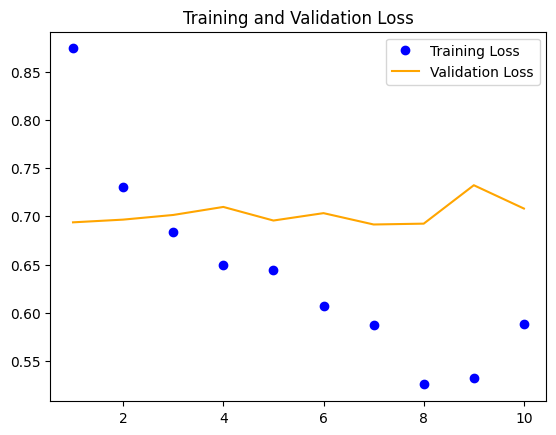

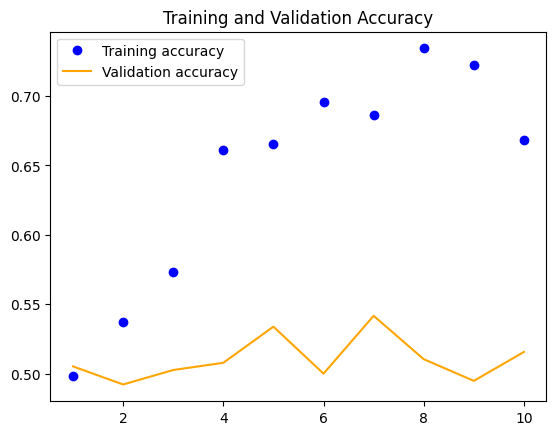

In [ ]:
plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

In [ ]:
test_flow = image_gen1.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=1,
    shuffle = False,
    class_mode='binary'
)
y_pred = model.predict(test_flow)
y_test = test_flow.classes

Found 20000 images belonging to 2 classes.


In [ ]:
print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))
print()
print(metrics.classification_report(y_test, y_pred > 0.5))

ROC AUC Score: 0.992412935
AP Score: 0.9915270175017084

              precision    recall  f1-score   support

           0       1.00      0.83      0.91     10000
           1       0.86      1.00      0.92     10000

    accuracy                           0.92     20000
   macro avg       0.93      0.92      0.91     20000
weighted avg       0.93      0.92      0.91     20000

